Found 3446 files belonging to 10 classes.
Class Names: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,056,187 (49.81 MB)

 Trainable params: 4,338,054 (16.55 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 8,676,110 (33.10 MB)

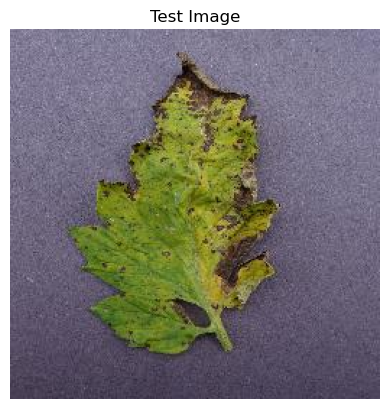

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Raw Predictions: [[2.3531116e-05 4.3723674e-05 7.2829437e-04 7.7365260e-03 9.8795342e-01
  3.0688487e-05 3.3333203e-05 4.2456727e-06 3.1430689e-05 3.4147052e-03]]
Predicted Class Index: 4
Predicted Class Name: Tomato___Septoria_leaf_spot
Accuracy for this prediction: 0.00%


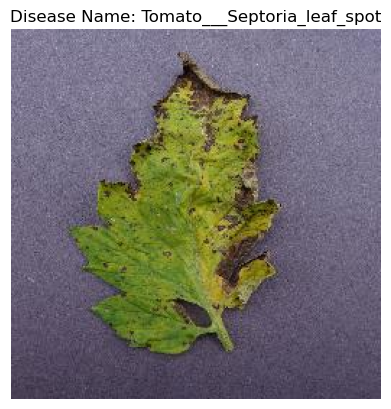

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load the validation set to access class names
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Extract class names
class_names = validation_set.class_names
print("Class Names:", class_names)

# Load the trained model
cnn = tf.keras.models.load_model('efficientnet_plant_disease_model12.keras')

# Display model summary
cnn.summary()

# Test Image Path
image_path = 'valid/Tomato___Septoria_leaf_spot/04840559-16ed-4f17-908b-2048ba83ab80___Keller.St_CG 1780.JPG'

# Read and display the original image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(img)
plt.title('Test Image')
plt.axis('off')  # Hide x and y ticks
plt.show()

# Preprocess the test image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Add batch dimension

# Normalize the input
input_arr = input_arr / 255.0

# Make predictions
predictions = cnn.predict(input_arr)
print("Raw Predictions:", predictions)

# Identify the class with the highest probability
result_index = np.argmax(predictions)
model_prediction = class_names[result_index]

# Display the result
print(f"Predicted Class Index: {result_index}")
print(f"Predicted Class Name: {model_prediction}")

# True Label (Manually Set for This Example)
true_label = 'Tomato___Tomato_mosaic_virus'

# Calculate Accuracy for this Prediction
accuracy = 100.0 if model_prediction == true_label else 0.0
print(f"Accuracy for this prediction: {accuracy:.2f}%")

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.axis('off')  # Hide x and y ticks
plt.show()
